climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Annual EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210, 'B': 2, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}
Integrating for 450 steps, 1826.2110000000002 days, or 5 years.


Total elapsed time is 5.000000000000044 years.


array([-70.,  70.])

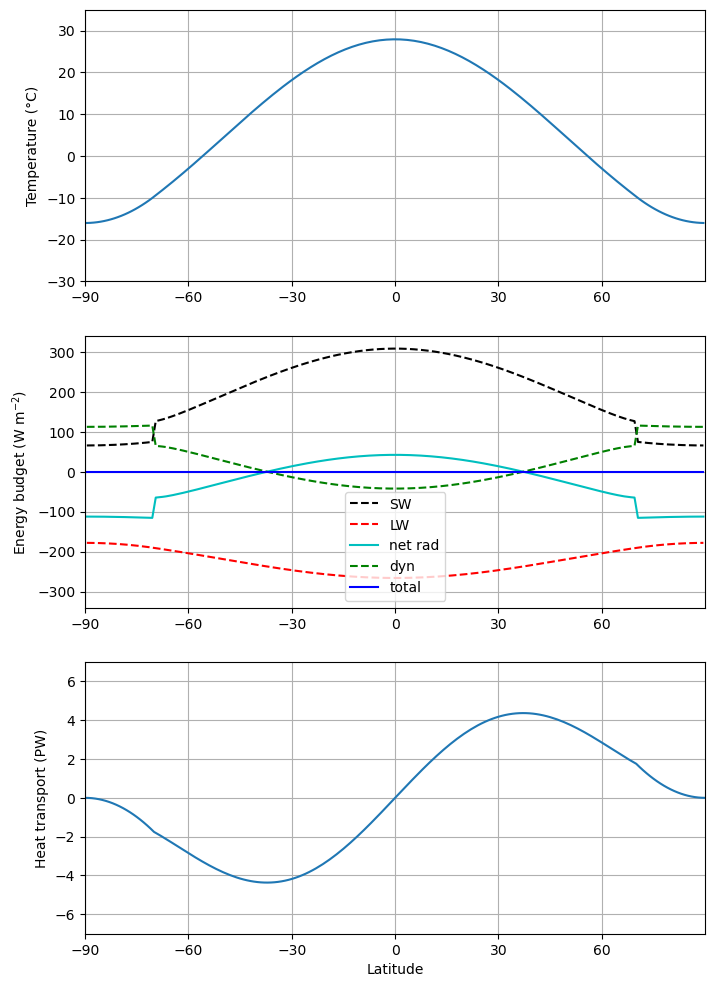

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab

#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='Annual EBM with ice line', 
                            num_lat=180, D=0.55, **param )
print( model1)

print(model1.param)

def ebm_plot( model, figsize=(8,12), show=True ):
    '''This function makes a plot of the current state of the model,
    including temperature, energy budget, and heat transport.'''
    templimits = -30,35
    radlimits = -340, 340
    htlimits = -7,7
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(model.lat, model.Ts)
    ax1.set_xlim(latlimits)
    ax1.set_ylim(templimits)
    ax1.set_ylabel('Temperature (°C)')
    ax1.set_xticks( lat_ticks )
    ax1.grid()
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(model.lat, model.ASR, 'k--', label='SW' )
    ax2.plot(model.lat, -model.OLR, 'r--', label='LW' )
    ax2.plot(model.lat, model.net_radiation, 'c-', label='net rad' )
    ax2.plot(model.lat, model.heat_transport_convergence, 'g--', label='dyn' )
    ax2.plot(model.lat, model.net_radiation
                        + model.heat_transport_convergence, 'b-', label='total' )
    ax2.set_xlim(latlimits)
    ax2.set_ylim(radlimits)
    ax2.set_ylabel('Energy budget (W m$^{-2}$)')
    ax2.set_xticks( lat_ticks )
    ax2.grid()
    ax2.legend()
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(model.lat_bounds, model.heat_transport)
    ax3.set_xlim(latlimits)
    ax3.set_ylim(htlimits)
    ax3.set_ylabel('Heat transport (PW)')
    ax3.set_xlabel('Latitude')
    ax3.set_xticks( lat_ticks )
    ax3.grid()

    return fig

model1.integrate_years(5)
f = ebm_plot(model1)

model1.icelat


array([-90.,  90.])

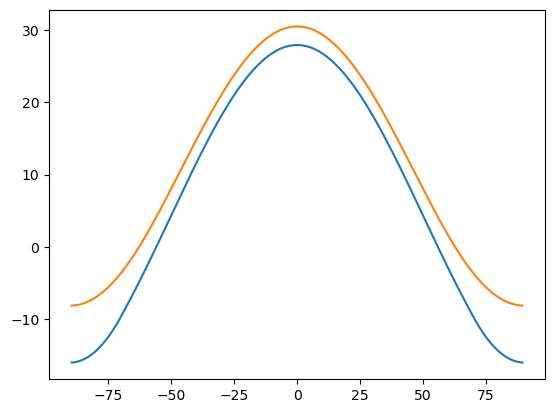

In [2]:
deltaA = 4.

model2 = climlab.process_like(model1)
model2.subprocess['LW'].A = param['A'] - deltaA
model2.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts)
plt.plot(model2.lat, model2.Ts)

model2.icelat


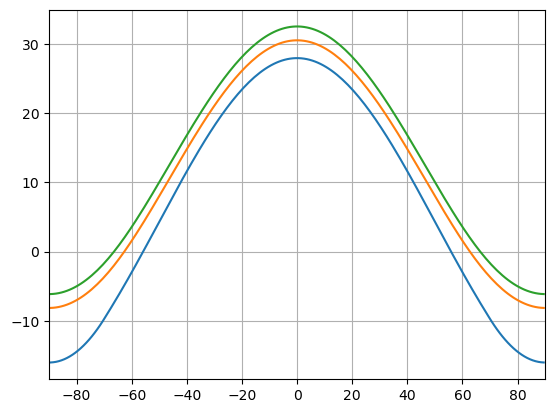

In [3]:
model3 = climlab.process_like(model1)
model3.subprocess['LW'].A = param['A'] - 2*deltaA
model3.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts)
plt.plot(model2.lat, model2.Ts)
plt.plot(model3.lat, model3.Ts)
plt.xlim(-90, 90)
plt.grid()


{'A': 210, 'B': 2, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62, 'Tf': -10.0}


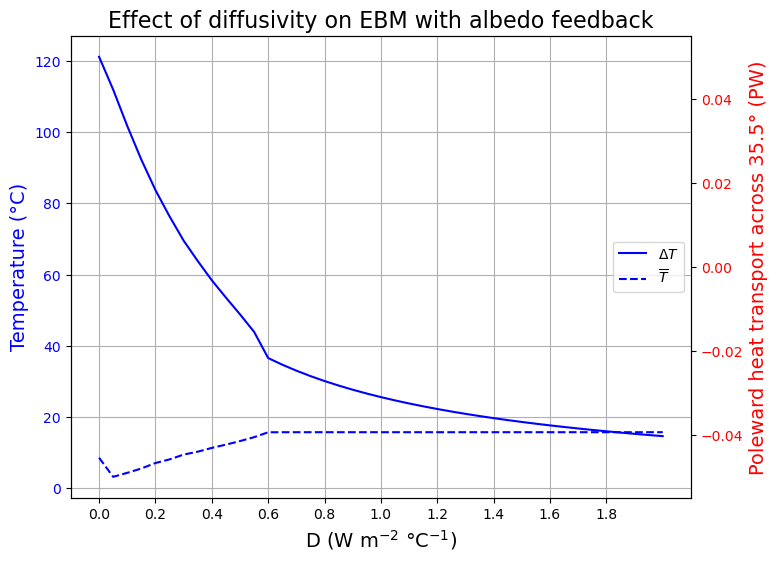

In [4]:
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
print( param)

Darray = np.arange(0., 2.05, 0.05)

model_list = []
Tmean_list = []
deltaT_list = []
Hmax_list = []

for D in Darray:
    ebm = climlab.EBM_annual(num_lat=180, D=D, **param )
    ebm.integrate_years(5., verbose=False)
    Tmean = ebm.global_mean_temperature()
    deltaT = np.max(ebm.Ts) - np.min(ebm.Ts)
    HT = np.squeeze(ebm.heat_transport)
    ind = np.where(ebm.lat_bounds==35.5)[0]
    Hmax = HT[ind]
    model_list.append(ebm)
    Tmean_list.append(Tmean)
    deltaT_list.append(deltaT)
    Hmax_list.append(Hmax)

color1 = 'b'
color2 = 'r'

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(Darray, deltaT_list, color=color1, label=r'$\Delta T$')
ax1.plot(Darray, Tmean_list, '--', color=color1, label=r'$\overline{T}$')
ax1.set_xlabel('D (W m$^{-2}$ °C$^{-1}$)', fontsize=14)
ax1.set_xticks(np.arange(Darray[0], Darray[-1], 0.2))
ax1.set_ylabel(r'Temperature (°C)', fontsize=14,  color=color1)
for tl in ax1.get_yticklabels():
    tl.set_color(color1)
ax1.legend(loc='center right')
ax2 = ax1.twinx()
ax2.plot(Darray, Hmax_list, color=color2)
ax2.set_ylabel('Poleward heat transport across 35.5° (PW)', fontsize=14, color=color2)
for tl in ax2.get_yticklabels():
    tl.set_color(color2)
ax1.set_title('Effect of diffusivity on EBM with albedo feedback', fontsize=16)
ax1.grid()


climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.P2Albedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 5.000000000000044 years.
climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.P2Albedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>
   point source: <class 'climlab.process.energy_budget.ExternalEnergySource'>

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 9.999999999999863 years.


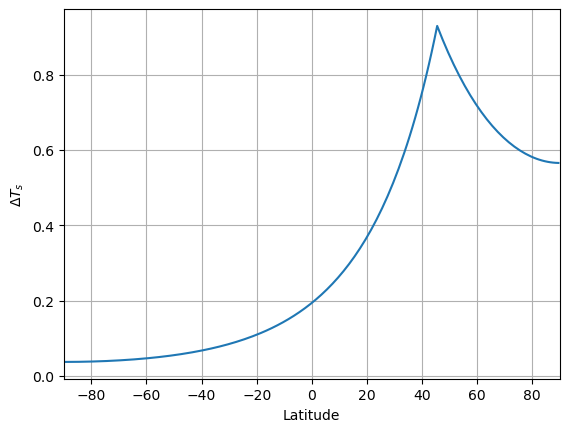

In [5]:
param_noalb = {'A': 210, 'B': 2, 'D': 0.55, 'Tf': -10.0, 'a0': 0.3, 'a2': 0.078}
m1 = climlab.EBM_annual(num_lat=180, **param_noalb)
print(m1)

m1.integrate_years(5.)

m2 = climlab.process_like(m1)

point_source = climlab.process.energy_budget.ExternalEnergySource(state=m2.state, timestep=m2.timestep)
ind = np.where(m2.lat == 45.5)
point_source.heating_rate['Ts'][ind] = 100.

m2.add_subprocess('point source', point_source)
print( m2)

m2.integrate_years(5.)

plt.plot(m2.lat, m2.Ts - m1.Ts)
plt.xlim(-90,90)
plt.xlabel('Latitude')
plt.ylabel(r'$\Delta T_s$')
plt.grid()


Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 5.000000000000044 years.
Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 9.999999999999863 years.


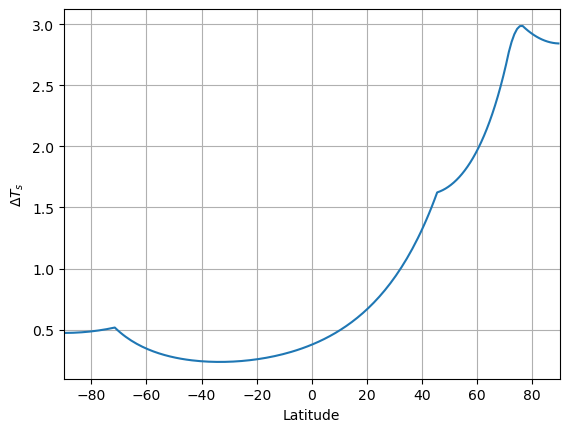

In [6]:
m3 = climlab.EBM_annual(num_lat=180, **param)
m3.integrate_years(5.)
m4 = climlab.process_like(m3)
point_source = climlab.process.energy_budget.ExternalEnergySource(state=m4.state, timestep=m4.timestep)
point_source.heating_rate['Ts'][ind] = 100.
m4.add_subprocess('point source', point_source)
m4.integrate_years(5.)

plt.plot(m4.lat, m4.Ts - m3.Ts)
plt.xlim(-90,90)
plt.xlabel('Latitude')
plt.ylabel(r'$\Delta T_s$')
plt.grid()
